In [2]:
%load_ext autoreload
%autoreload
%matplotlib widget

import cProfile
import util


In [16]:
%autoreload

DATA_LOCATION = "D:/thesis_data/1hour_complete_22_01_10_05/"
DATA_LOCATION = "../raw_data/aicrowd/"

#cProfile.run("util.read_data(DATA_LOCATION)")
util.clear_db()
util.init_db()
util.read_data(DATA_LOCATION, format='AIcrowd')

Deleting old data


  0%|          | 0/1 [00:00<?, ?it/s]

training_1_category_1
Reading sensors
Writing sensors to DB
Reading Set 1
Writing 1974059 messages to DB
removing duplicate records
0 bad record keys
[]
Writing 4633478 records to DB


55606 55606
197354 197354
137538 137538
117250 117250
135293 135293


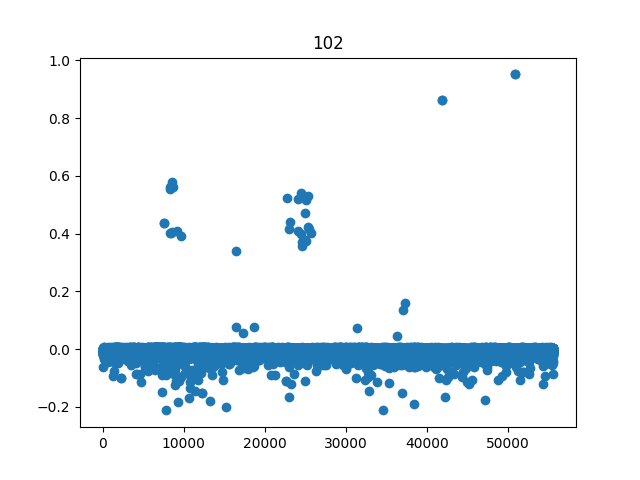

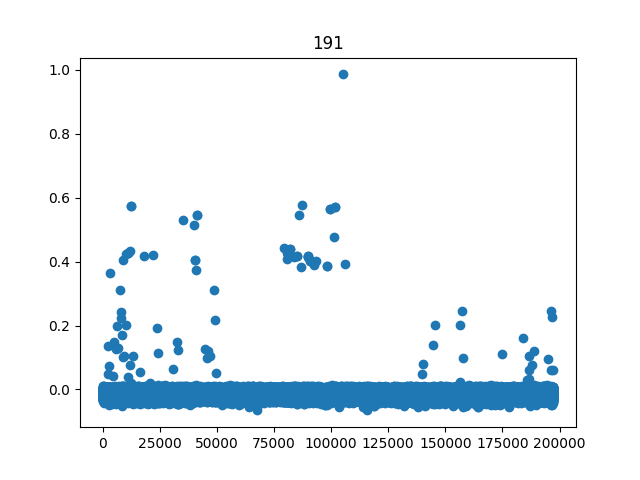

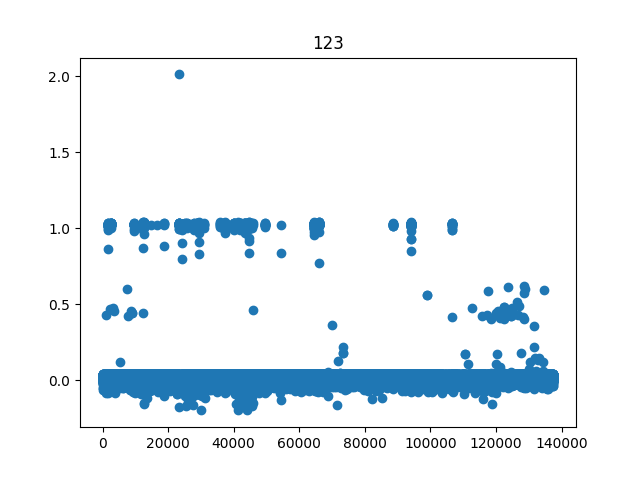

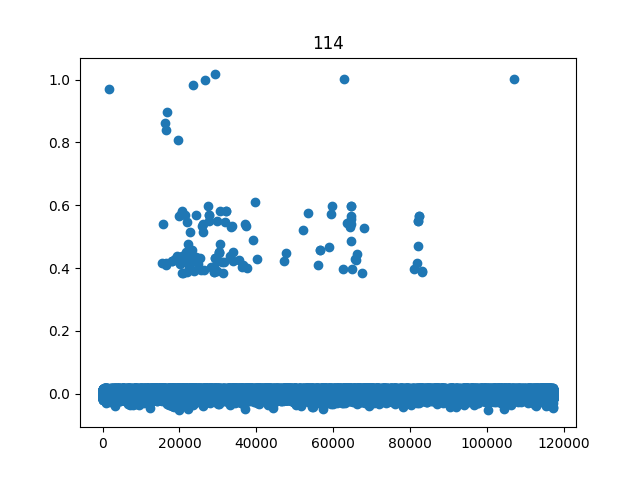

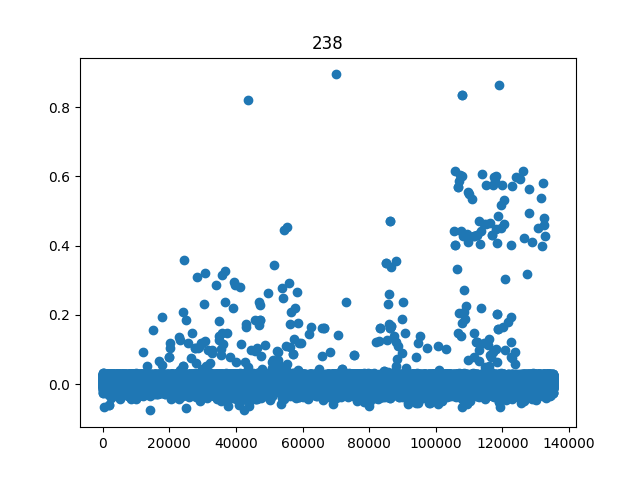

In [1]:
%load_ext autoreload
%autoreload
%matplotlib widget

import util
util.visualize_timedrift()

In [2]:
%load_ext autoreload
%autoreload

import util
util.cleanup_sensors()
util.cleanup_messages()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Cleaning up sensors
Sensors with too high serverTimstamp variances: 0
Sensors with < 2 records: 0
Cleaning up messages
Deleting 207170 messages


Aggregating directional variances in flightpaths


  0%|          | 0/1436 [00:00<?, ?it/s]

Removing 288 Flight Paths
426069 messages deleted


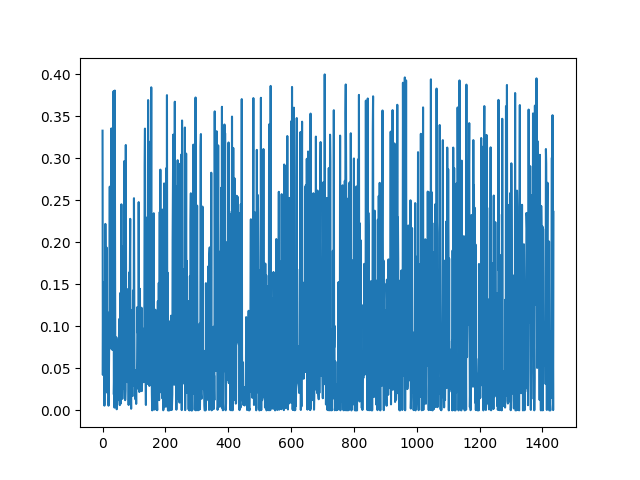

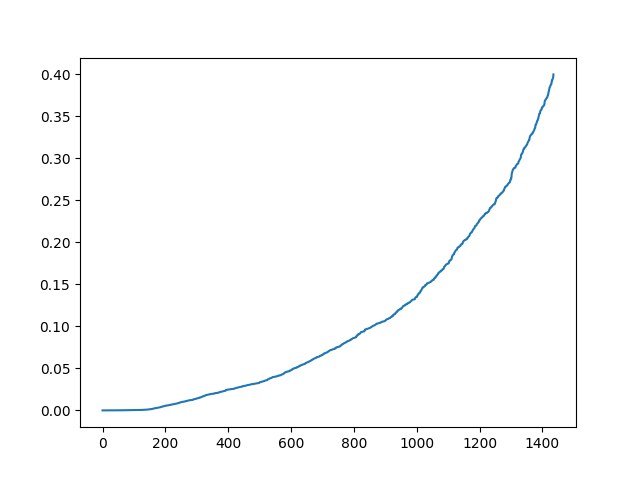

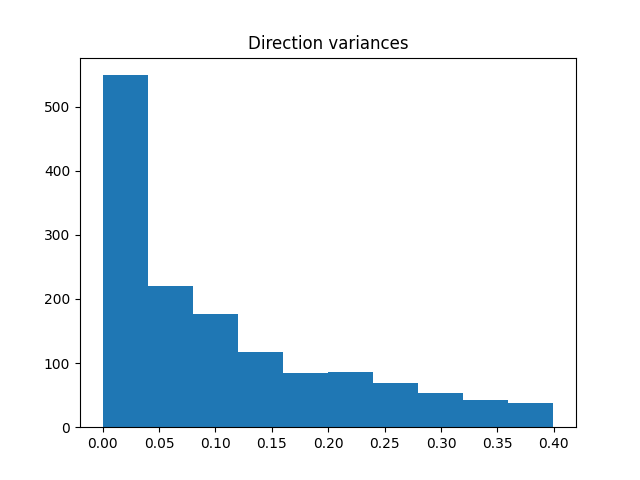

In [4]:
%autoreload
util.cleanup_flightpaths(outlier_dist_cutoff=1e3, variance_cutoff=0.2)

Total Dist: 215.05 km


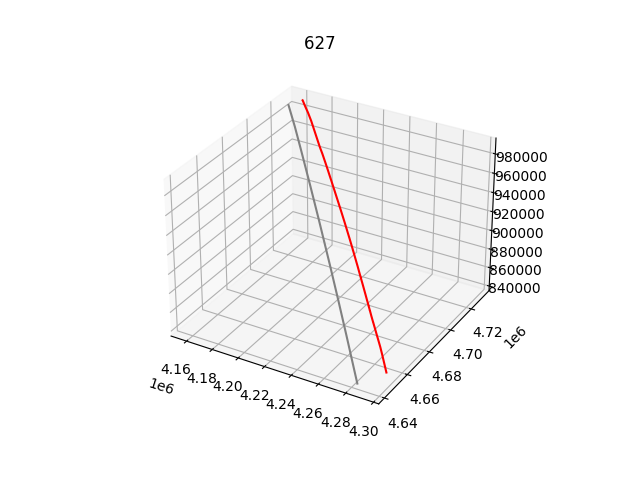

In [5]:
%autoreload
#util.visualize_flightpaths(icao='410')
util.visualize_flightpaths()

In [10]:
%load_ext autoreload
%autoreload

import timedelta_utils
from pstats import Stats

timedelta_utils.calc_timedeltas()
#timedelta_utils.propagate_timedeltas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/80 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
n sensors: 80
connected sensor pairs: 239 / 6320 (3%)
Mean mean: 2.0800573859140726e-05
Mean variance: 1.0359878786301713e-08
Max variance: 8.874754131609348e-08 sensors: (125, 436, 0.00017646145421121832, 8.874754131609348e-08)
341 341
max_i 282
372.829924265 371.860000133514
373.043475109 371.860000133514
(0.2135508439999967, 282)


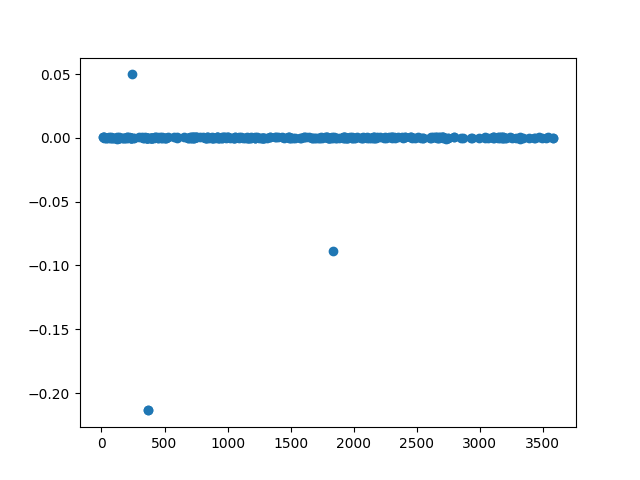

In [11]:
%load_ext autoreload
%autoreload
timedelta_utils.timedelta_statistics()

In [ ]:
# test box for mlat

%load_ext autoreload
%autoreload
%matplotlib widget

import mlat_utils
from util import GeoPoint
from collections import defaultdict

C = 299792458
sensor_ids = list(range(4))
sensor_locations = {
    0: GeoPoint('ecef', C+7, 0, 6),
    1: GeoPoint('ecef', 19, C-12, 0),
    2: GeoPoint('ecef', 15, 47, C),
    3: GeoPoint('ecef', C, -C, 1),
    4: GeoPoint('ecef', C+10, 20, -30),
    5: GeoPoint('ecef', 0, 0, 0)
}

sensor_timestamps = {
    0: 1,
    1: 1,
    2: 1,
    3: 2**0.5,
    4: 1,
    5: 0
}

time_deltas = {i: {j: (0, 0) for j in sensor_ids} for i in sensor_ids}

pos = mlat_utils.calc_mlat_sympy(sensor_ids, sensor_locations, sensor_timestamps, time_deltas, debug=True)
print(pos.pos() if pos else "None")


In [15]:
%load_ext autoreload
%autoreload
%matplotlib widget
import cProfile
import mlat_utils
import mlat_utils2
from pstats import Stats

#pr = cProfile.Profile()
#pr.enable()

# use_sympy:
# sympy solves mlat least squares with arbitrary precision
# Takes much longer, but prevents numerical instabilities
mlat_utils2.calc_positions(variance_cutoff=1e-8, use_sympy=False, limit=-100)

#pr.disable()
#stats = Stats(pr)
#stats.sort_stats('tottime').print_stats(25)

# Check calculated position quality
mlat_utils.summarize_accuracy('raw')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/167771 [00:00<?, ?it/s]

Number of received messages: (1209255,)
Number of calculated positions: (51936,)
Best dist: 2141.936619062403
Worst dist: 299816429.3544389
Mean dist: 1422595.5179998688
Median dist: 66376.5128074467


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N messages: 606
N messages: 51
N messages: 249
N messages: 190
N messages: 6


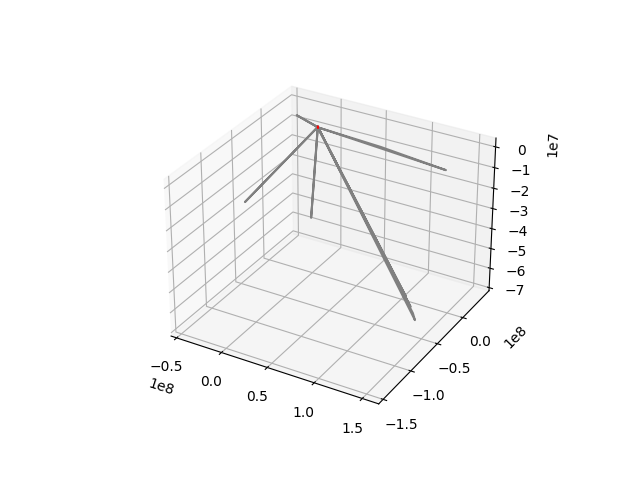

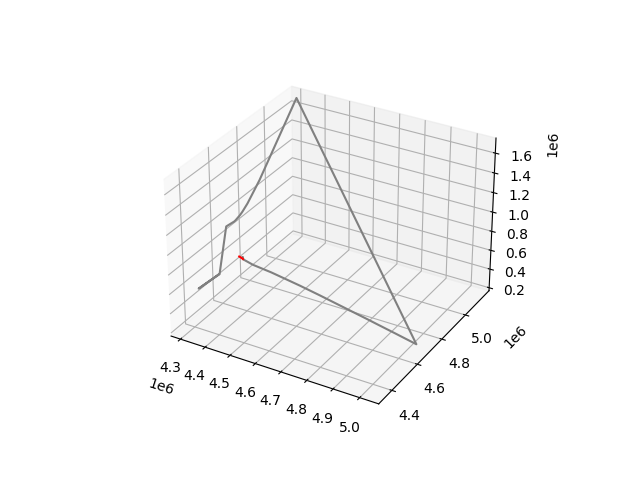

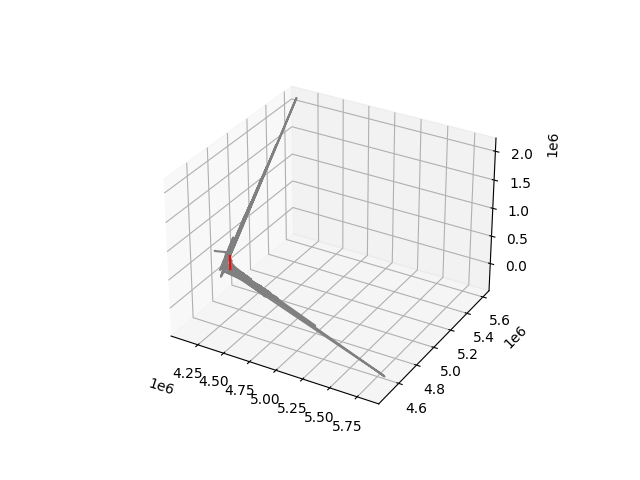

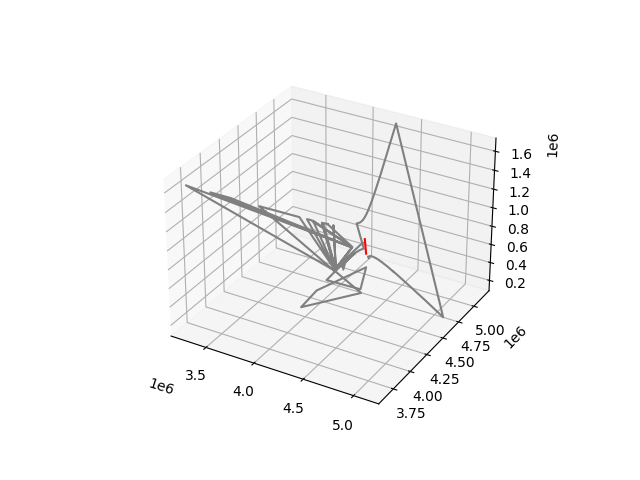

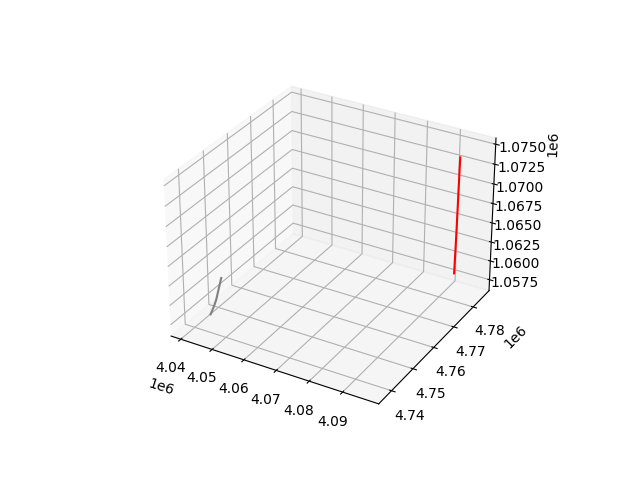

In [16]:
# check the results visually

import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.visualize_flight_paths('raw')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/236 [00:00<?, ?it/s]

Removed 1 / 1 positions
Removed 0 / 2 positions
Removed 50 / 727 positions
Removed 1 / 26 positions
Removed 5 / 49 positions
Removed 1 / 1 positions
Removed 22 / 249 positions
Removed 0 / 21 positions
Removed 62 / 370 positions
Removed 0 / 7 positions
Removed 9 / 125 positions
Removed 1 / 1 positions
Removed 56 / 778 positions
Removed 20 / 107 positions
Removed 2 / 4 positions
Removed 61 / 554 positions
Removed 2 / 37 positions
Removed 2 / 16 positions
Removed 0 / 8 positions
Removed 4 / 47 positions
Removed 0 / 21 positions
Removed 3 / 50 positions
Removed 2 / 17 positions
Removed 0 / 5 positions
Removed 244 / 1325 positions
Removed 22 / 135 positions
Removed 1 / 1 positions
Removed 2 / 10 positions
Removed 2 / 2 positions
Removed 86 / 750 positions
Removed 7 / 32 positions
Removed 70 / 617 positions
Removed 1 / 57 positions
Removed 117 / 869 positions
Removed 34 / 324 positions
Removed 4 / 292 positions
Removed 18 / 167 positions
Removed 0 / 6 positions
Removed 1 / 5 positions
Remove

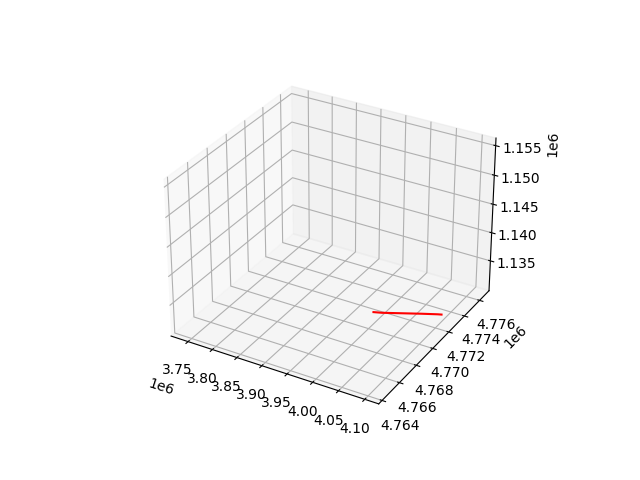

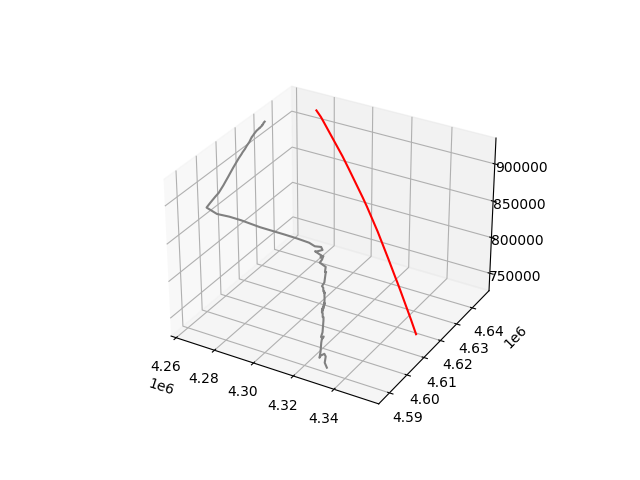

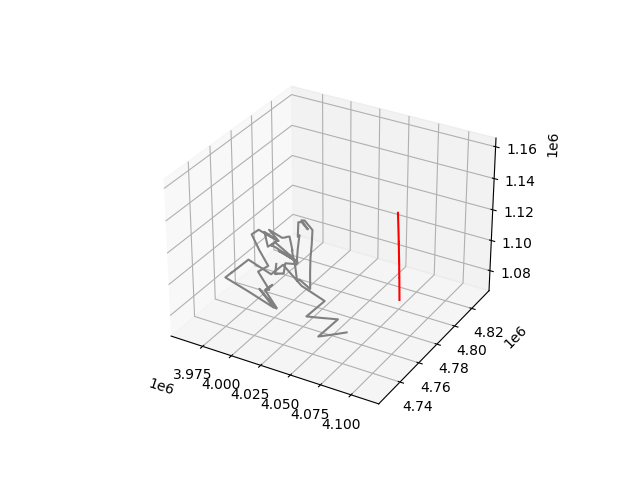

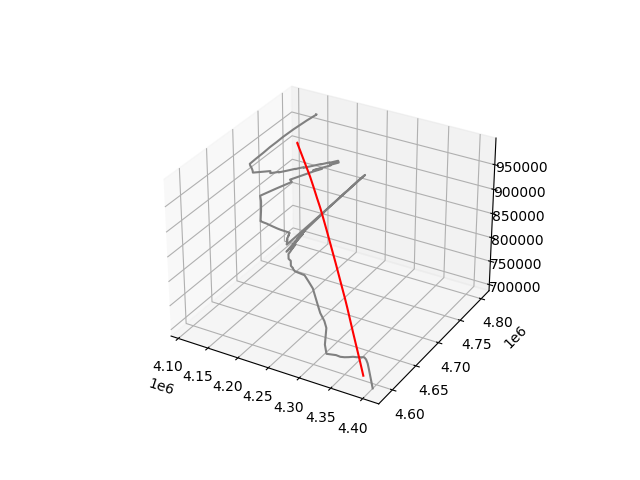

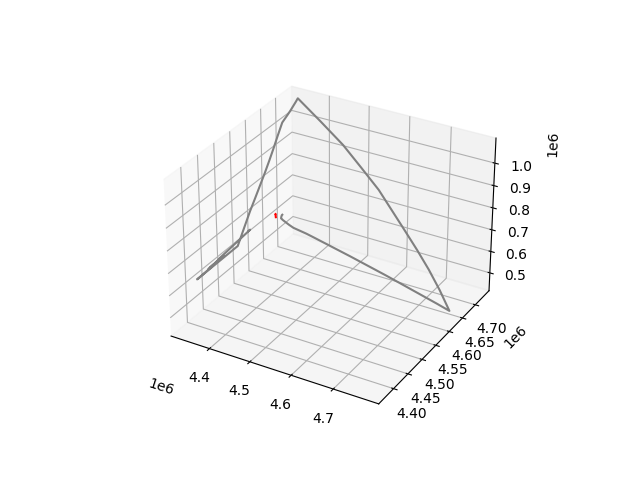

In [17]:
# do contextual adjustments to calculated positions
import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.post_process_positions()
mlat_utils.visualize_flight_paths('corrected')
mlat_utils.summarize_accuracy('corrected')

In [11]:
util.close_db()